# **Machine Learning for Physics and Astronomy - Mini Project**

## Kaya Han Taş - 15064735 (Astronomy & Astrophysics)

### (Note: All the **Images/Data** and **the Saved Trained Models** for [Part 3: Improvements to our Image Preprocessing and Convolutional Neural Network Model](#Part_3) can be found on **[Google Drive](https://drive.google.com/drive/folders/1-iXLjToyePTkPUqjaUJzoi0U8iy7aGiP?usp=drive_link)**, alongside the Jupyter Notebook file to avoid path issues.)

### Introduction

* Emotion Detection from Facial Expressions has been one of the crucial tasks in Machine Learning applications.
* It is important mostly for **psychological research, marketing and security** purposes.
* Since it is a well-studied task to do with Machine Learning, it is also used often to develop and optimize our Machine Learning algorithms.
* Our goal is to **develop a Convolutional Neural Network (CNN) model to detect Emotions from Facial Expression Images from a known Dataset.**

* In this project, we will focus on detecting 7 emotions from Facial Expressions: **Angry, Disgusted, Fear, Happy, Neutral, Sad and Surprised.**
* For this, we use the well-known **FER-2013** dataset.

### Data Description

* We use **FER-2013** Dataset which can be found on **[Kaggle](https://www.kaggle.com/datasets/msambare/fer2013/data)**.
* The data consists of **$48 \times 48$ Pixel, Grayscale Images** of faces with different expressions.
* The images are registered so that the faces are more or less centered and occupies about same amount of space in the images.

* **In summary the preprocess steps:**
    * 1-) **$48 \times 48$ Pixel Size**
    * 2-) **Grayscale**
    * 3-) **Faces centered to the center, occupying the same amount of space.**

* **The Dataset consists of 7 Categories with following labels:**
    * `0 = Angry`
    * `1 = Disgust`
    * `2 = Fear`
    * `3 = Happy`
    * `4 = Sad`
    * `5 = Surprise`
    * `6 = Neutral`

* **Training Set:** 28709 Images
* **Test Set:** 7178 Images
* **Total Amount of Images:** 35887 Images

### Methodology & Results

* We need to classify all the images into 7 Labels/Emotions.
* All of these images need to be analyzed and depending on the **(facial) features** on the image, they have to be labeled according to the emotion on the image.
* **So we need to find and learn complex patterns on our images!**

* **For this reason we can choose our model as Convolutional Neural Network (CNN):**
    * 1-) **Good for recognizing features and patterns on the images with Convolutional Layers.**
        * *Convolutional Layers apply filters to small regions on the image to determine edges, features, textures and shapes.*
    * 2-) **They can be built more convoluted to determine more complex features.**
        * *Especially in our case, determining the emotions from the images requires a lot of complex features to be determined, hence making CNN a good approach.*
    * 3-) **It is efficient since we reshape the image (such as Max Pooling) to determine the features which makes the analysis/training faster.**
        * *Max Pooling also **makes the image translation invariant!***
        * *Max Pooling **does not affect the important features on the image but still reduces the dimensions of the image!***

* Now, let's **import our images** and **define our Convolutional Neural Network!**

### Part 1: Introduction of the Dataset & Preprocessing

In [1]:
#We first Import the required libraries as follows.
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import ImageFolder #Imported to link the Image Folder
from torch.utils.data import DataLoader #Imported to load the data into our code.
import torchvision.transforms as transforms #Imported to transform the image so that we can use it.
import collections

In [2]:
#We first have to define the transformations since we'll need them when loading in the data.
    #transforms.Grayscale(num_output_channels = 1): Used to transform images into Grayscale with 1 Channel.
    #transforms.Resize((48, 48)): Used to Resize the Images to 48 x 48.
    #transforms.ToTensor(): Used to transform the images to a Tensor so that we can use them.
    #transforms.Normalize(): Used to Normalize the Images so that they have Mean = 0 and Standard Deviation = 1
#(It is helpful for stabilization during training!).
transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1),
                                transforms.Resize((48, 48)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [3]:
#We now set the path to Dataset using the ImageFolder from torchvision.datasets
    #root: The path to the Dataset.
    #transform: Used to transform the images.
training_dataset = ImageFolder(root = "train", transform = transform)
test_dataset = ImageFolder(root = "test", transform = transform)

#We print out the datasets.
print("Training Data:", "\n", 90 * "-", "\n", training_dataset)
print(90 * "~")
print("Test Data:", "\n", 90 * "-", "\n", test_dataset)

Training Data: 
 ------------------------------------------------------------------------------------------ 
 Dataset ImageFolder
    Number of datapoints: 28709
    Root location: train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Data: 
 ------------------------------------------------------------------------------------------ 
 Dataset ImageFolder
    Number of datapoints: 7178
    Root location: test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
#We can visualize our data.
#For this we use .targets on the ImageFolders we have defined.
training_targets = training_dataset.targets
test_targets = test_dataset.targets

#We use the collections.Counter to check the counts of each label.
training_counter = collections.Counter(training_targets)
test_counter = collections.Counter(test_targets)

print(training_counter)
print(test_counter)

Counter({3: 7215, 4: 4965, 5: 4830, 2: 4097, 0: 3995, 6: 3171, 1: 436})
Counter({3: 1774, 5: 1247, 4: 1233, 2: 1024, 0: 958, 6: 831, 1: 111})


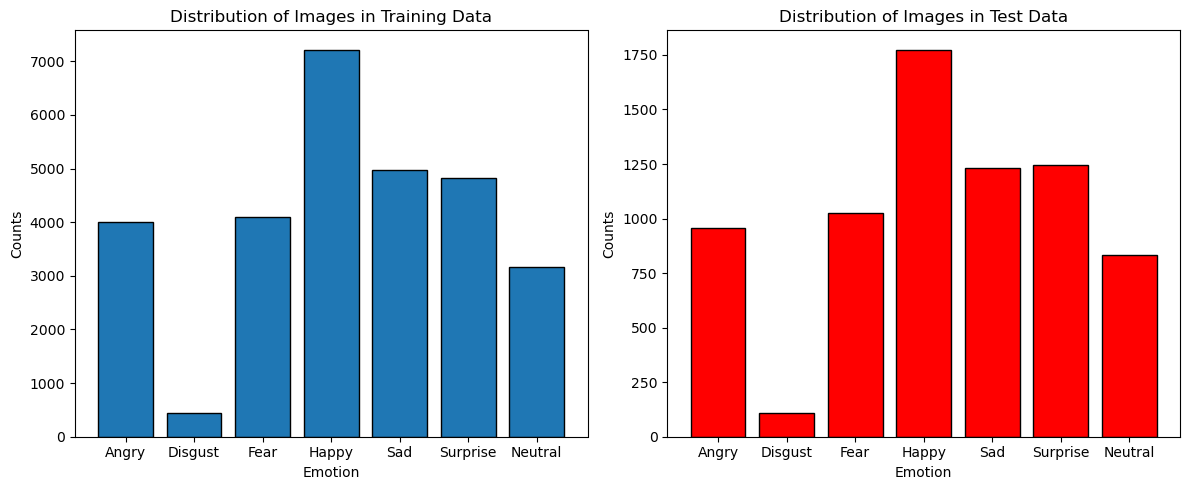

In [5]:
#We extract the Unique Numbers and their Counts as follows.
training_numbers = list(training_counter.keys())
training_counts = list(training_counter.values())

test_numbers = list(test_counter.keys())
test_counts = list(test_counter.values())

#We define a list of the emotions.
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

#We define emotions as numbers and put it into a dictionary.
label_to_emotion = {i: emotion for i, emotion in enumerate(emotions)}

#We replace the numbers we have obtained with the Emotions.
training_numbers = [label_to_emotion[number] for number in training_numbers]
test_numbers = [label_to_emotion[number] for number in test_numbers]

#We plot the Distribution of Images in Training and Test Data.
figure, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].bar(training_numbers, training_counts, edgecolor = "black")
axes[0].set_title("Distribution of Images in Training Data")
axes[0].set_xlabel("Emotion")
axes[0].set_ylabel("Counts")

axes[1].bar(test_numbers, test_counts, color = "red", edgecolor = "black")
axes[1].set_title("Distribution of Images in Test Data")
axes[1].set_xlabel("Emotion")
axes[1].set_ylabel("Counts")

plt.tight_layout()
plt.show()

In [6]:
#Now we create DataLoader Objects to load the data into the code.
    #DataLoader(ImageFolder, batch_size, shuffle)
    #batch_size: Represents how many images a batch will have.
    #shuffle: Represents whether we want to shuffle the samples inside the batch or not during the training.
    
training_loader = DataLoader(training_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [7]:
#We first take the DataLoader objects and turn them into a list.
#This way, each element of the list will represent a Minibatch from the datasets!
#For this, we check the Test DataLoader.
test_example = list(test_loader)

#We take an Example Data and Example Target from the list we have defined.
example_data, example_target = test_example[0]

#We check their shapes:
    #example_data: Contains the Input Data (images) from the first mini-batch i.e torch.Size([64, 3, 48, 48])
#where the numbers represent [batch_size, channels, height, width].
    #example_targets: Contains the corresponding Target Labels for the Input Data i.e. torch.Size([64]) where
#the number represents the batch_size.
print(example_data.shape)
print(example_target.shape)

torch.Size([32, 1, 48, 48])
torch.Size([32])


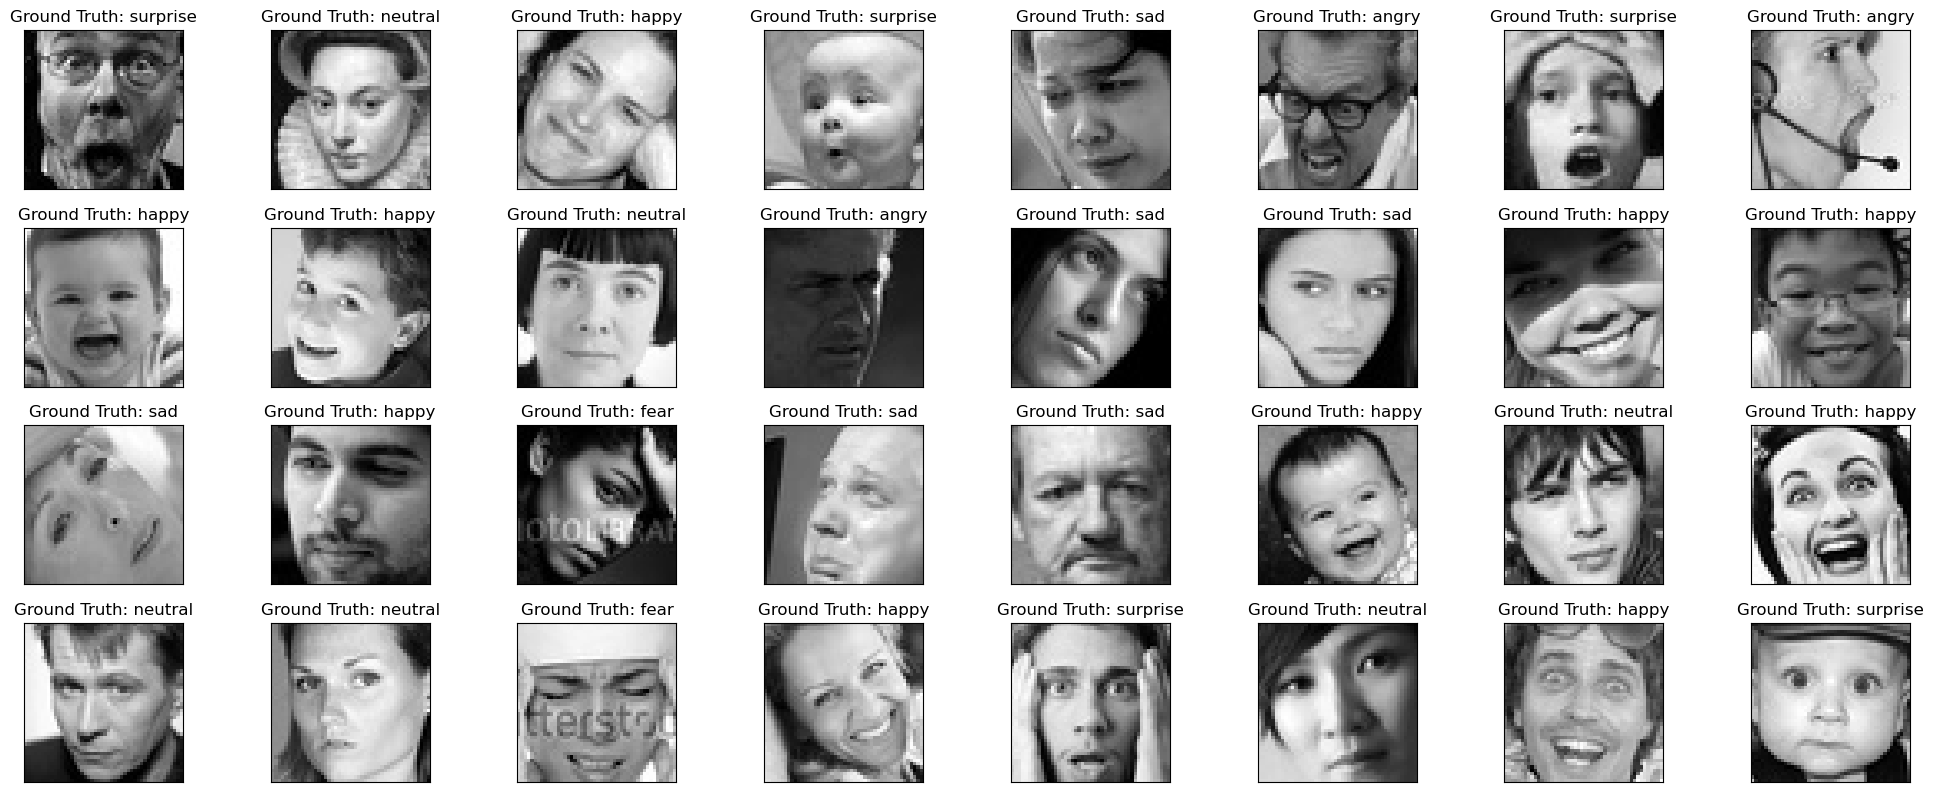

In [8]:
#We will now show some of the Images in our test_dataset batch.
#For this, we get the classes inside the test_dataset batch with .classes.
class_names = test_dataset.classes

#We plot the test_dataset images.
figure = plt.figure(figsize = (20, 10))
for i in range(32):
    plt.subplot(5, 8, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap = "grey", interpolation = "none")
    plt.title(f"Ground Truth: {class_names[example_target[i]]}")
    plt.xticks([])
    plt.yticks([])

* Now that we know how our Test Images and Labels look like, let's work on defining the Model.

### Part 2: Defining the Model & Training the Model <a id = "Part_2"></a>

* Now we need to define a **Convolutional Neural Network (CNN)** for training.
* We need to end up with $6\times6$ image with channels that are enough to get a dense layer with **7 units i.e. 7 Emotions** in the end!
* **Note that we need many features hence units on our first layer to determine the Emotions more accurately.**
* **For this our Layer structure will be as follows:**
* 1-) **Input Image:**
    * **$1\times48\times48$** => $1$ Channel & $48\times48$ Spatial Dimensions
    * *Represents the Dimensions of the Input Image Tensor.*
* 2-) **First Convolutional Layer:**
    * **$3\times3$ Kernel**
    * **$32\times48\times48$ Output** => $32$ Channels & $48\times48$ Spatial Dimensions
    * *Applies 32 Convolutional Filters of size $3\times3$ to the input image.*
    * *This results in 32 Output Channels with the same Spatial Dimensions as the input.*
* 3-) **First Max Pooling Layer:**
    * **$2\times2$ Pooling**
    * **$32\times24\times24$ Output** => $32$ Channels & $24\times24$ Spatial Dimensions
    * *We perform Max Pooling with $2\times2$ kernel.*
    * *This results in reduced Spatial Dimensions by half!*
* 4-) **Second Convolutional Layer:**
    * **$3\times3$ Kernel**
    * **$64\times24\times24$** Output => $64$ Channels & $24\times24$ Spatial Dimensions
    * *Applies 64 Convolutional Filters of $3\times3$ to the input image.*
    * *This results in 64 Output Channels with the same Spatial Dimensions as the input.*
* 5-) **Second Max Pooling Layer:**
    * **$2\times2$ Pooling**
    * **$64\times12\times12$ Output** => $64$ Channels & $12\times12$ Spatial Dimensions
    * *We perform Max Pooling with $2\times2$ kernel.*
    * *This results in reduced Spatial Dimensions by half!*
* 6-) **Third Convolutional Layer:**
    * **$3\times3$ Kernel**
    * **$128\times24\times24$** Output => $128$ Channels & $12\times12$ Spatial Dimensions
    * *Applies 128 Convolutional Filters of $3\times3$ to the input image.*
    * *This results in 128 Output Channels with the same Spatial Dimensions as the input.*
* 7-) **Third Max Pooling Layer:**
    * **$2\times2$ Pooling**
    * **$128\times6\times6$ Output** => $128$ Channels & $6\times6$ Spatial Dimensions
    * *We perform Max Pooling with $2\times2$ kernel.*
    * *This results in reduced Spatial Dimensions by half!*
* 8-) **Flattening/Reshaping:**
    * Reshape into **1 Dimensional** Vector with $128 \times 36 = 4608$ length! =>  $128$ Channels & $6\times6$ Spatial Dimensions
    * *Reshapes the output Tensor from the Convolutional Layers to a 1D Vector!*
* 9-) **First Fully Connected/Dense Layer:**
    * Output => $512$ Units
    * *Applies a Dense Layer with 512 Units!*
* 10-) **Dropout Layer**
    * *Applies Dropout Regularization with a probability of $0.25$ to **prevent overfitting**.*
    * ***Forces the model/network to learn more robust features.***
* 11-) **Second Fully Connected/Dense Layer:**
    * Output => $7$ Units (**7 Classes for Emotions**)
    * *We end up with Dense Layer with 7 Units which represent the Emotions!*

* **Note: We will use padding for our Convolutional Layers!**
* **`padding = 1`:** ***A border of 1 pixel width filled with zeros, added to the Input Feature Map before Convolution!***
    * 1-) We do this in order to ensure that the **Input Feature Map and Output Feature Map have the same Spatial Dimensions!**
    * 2-) We do this to **also ensure that convolution is applied symmetrically around each pixel of the Input Feature Map!** *(Capturing Information from entire Spatial Extent of the input!)*

* Now we define our CNN according to the layout we have talked about.

In [9]:
#We define our CNN Class.
class Convolutional_Neural_Network(nn.Module):
    def __init__(self):
        super(Convolutional_Neural_Network, self).__init__()

        #We define our First Convolutional Layer.
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, padding = 1)

        #We define our Second Convolutional Layer.
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)

        #We define our Third Convolutional Layer.
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)

        #We define a General Max Pooling Layer.
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

        #We define the Dropout Layer. (Prevents overfitting!!!)
        self.dropout = nn.Dropout(0.25)

        #We define our First Dense (Fully Connected) Layers.
        self.dense1 = nn.Linear(128 * 6 * 6, 512)

        #We define our Second Dense (Fully Connected) Layers.
        self.dense2 = nn.Linear(512, 7)

    def forward(self, x):
        #We apply the ReLU Activation Function to the First Convolutional Layer. => (F = torch.nn.functional)
        #Then we apply Max Pooling to it using self.pool!
        x = self.pool(F.relu(self.conv1(x)))

        #We apply ReLU Activation Function to Second Convolutional Layer.
        #Then we apply Max Pooling to it.
        x = self.pool(F.relu(self.conv2(x)))

        #We apply ReLU Activation Function to Third Convolutional Layer.
        #Then we apply Max Pooling to it.
        x = self.pool(F.relu(self.conv3(x)))

        #We then Flatten/Reshape the Output.
        x = x.view(-1, 128 * 6 * 6)

        #We apply the First Dense Layer.
        #Then we apply ReLU Activation Function to it for "Non-Linearity"
        x = F.relu(self.dense1(x))

        #We apply the Dropout Layer.
        x = self.dropout(x)

        #Finally, we apply the Second Dense Layer.
        x = self.dense2(x)

        return x

In [10]:
#We now call our defined CNN to create an object.
model = Convolutional_Neural_Network()
print(model)

Convolutional_Neural_Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (dense1): Linear(in_features=4608, out_features=512, bias=True)
  (dense2): Linear(in_features=512, out_features=7, bias=True)
)


In [11]:
#We define our Loss Function as Cross Entropy Loss.
criterion = nn.CrossEntropyLoss()

#We define the Optimizer as "Adam" Optimizer.
#We define the learning rate as lr = 0.001.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [12]:
#Now we will train our Model.
#For this we first define number of epochs i.e. How many batches we will sample from the Training Data to
#train our model.
num_epochs = 15

#We define Lists to keep the Training and Testing Losses and Counters!
train_losses = []
train_counter = []
test_losses = []
test_counter = [i * len(training_loader.dataset) for i in range (num_epochs + 1)]

#We also determine how often the training should log the information about Losses and Counter!
log_interval = 10

In [13]:
####################################### This is the main Training loop #######################################

#Now we define our Training Loop.
def train(epoch):
    #We set the model to training mode.
    model.train()
    
    #We do a loop over all the Images and Their Labels in our Training Data.
    #For the Training Data we use the DataLoader object i.e. training_loader.
    #Note that we don't have to shuffle the batches by hand since the DataLoader has shuffle = True.
    #So the Batches will shuffle for each epoch.
    for batch_index, (images, labels) in enumerate(training_loader):
        #We set the Gradient to Zero!
        optimizer.zero_grad()

        #We call the Model to Make Label Predictions! (forward pass)
        label_pred = model(images)

        #We Evaluate the Predictions using Loss! (compute loss)
        loss = criterion(label_pred, labels)
        
        #We Evaluate the Gradient of the Loss. (backward pass)
        loss.backward()

        #We take an Optimizer Step!
        optimizer.step()

        #We check the Batch Index.
        #If the index is in "tens", we print the Training Epoch and add the Loss + Counter to our lists.
        if batch_index % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}". format(
                epoch, batch_index * len(images), len(training_loader.dataset),
                100 * batch_index / len(training_loader), loss.item()))
            
            train_losses.append(loss.item())
            train_counter.append((batch_index * 64) + ((epoch - 1) * len(training_loader.dataset)))

##############################################################################################################

In [14]:
######################################## This is the main Testing loop #######################################

def test():
    #We set the model to Evaluation Mode.
    model.eval()

    #We define test_loss and set it to zero to keep track of the Total Loss on the Test Dataset.
    test_loss = 0

    #We also define correct and set it to zero to keep track of the numbers of correctly classified images!
    correct = 0

    #We use torch.no_grad() to avoid calculating any gradients. => Good for Memory Usage.
    with torch.no_grad():
        #We check all the Images and Labels in the test_loader.
        for image, label in test_loader:
            #We pass the data through our CNN/Model.
            #Basically we call the model to make Predictions! (forward pass)
            label_pred = model(image)

            #We evaluate the predictions using Loss! (compute loss)
            #This time we add it to our test_loss variable!
            test_loss += F.cross_entropy(label_pred, label, reduction = "sum").item()

            #We predict the Class Labels by taking the Index of the Maximum Value along the Second Dimension
            #of the Output Tensor!
            label_pred = label_pred.data.max(1, keepdim = True)[1]

            #We calculate how many times the Model has guessed the labels correct by comparing the predicted
            #labels "label_pred" with actual target labels "label"!
            correct += label_pred.eq(label.data.view_as(label_pred)).sum()

    #We calculate the Average Test Loss by dividing it with the number of samples in the Test Dataset.
    test_loss /= len(test_loader.dataset)

    #We append the Average Test Loss to a list to keep the track of losses.
    test_losses.append(test_loss)

    #We print out the Evaluation Results.
    print("\nTest Set: Avg. Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n". format(
        test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)))
        
##############################################################################################################

In [15]:
#Finally, we do training.
#First we check how well our model predicts the Test Data.
test()


Test Set: Avg. Loss: 1.9442, Accuracy: 1003/7178 (14%)



In [16]:
#Now we train our data by looping over the Epochs.
for epoch in range(1, num_epochs + 1):
    #We train our Model.
    train(epoch)

    #We check how accurate the Model has become with the Test Data.
    test()

Train Epoch: 1 [0/28709 (0%)]	Loss: 1.947891
Train Epoch: 1 [320/28709 (1%)]	Loss: 1.842101
Train Epoch: 1 [640/28709 (2%)]	Loss: 1.860013
Train Epoch: 1 [960/28709 (3%)]	Loss: 1.778546
Train Epoch: 1 [1280/28709 (4%)]	Loss: 1.807385
Train Epoch: 1 [1600/28709 (6%)]	Loss: 1.782035
Train Epoch: 1 [1920/28709 (7%)]	Loss: 1.754525
Train Epoch: 1 [2240/28709 (8%)]	Loss: 1.803744
Train Epoch: 1 [2560/28709 (9%)]	Loss: 1.875562
Train Epoch: 1 [2880/28709 (10%)]	Loss: 1.821388
Train Epoch: 1 [3200/28709 (11%)]	Loss: 1.822012
Train Epoch: 1 [3520/28709 (12%)]	Loss: 1.704823
Train Epoch: 1 [3840/28709 (13%)]	Loss: 2.109173
Train Epoch: 1 [4160/28709 (14%)]	Loss: 1.824427
Train Epoch: 1 [4480/28709 (16%)]	Loss: 1.681724
Train Epoch: 1 [4800/28709 (17%)]	Loss: 1.619024
Train Epoch: 1 [5120/28709 (18%)]	Loss: 1.742340
Train Epoch: 1 [5440/28709 (19%)]	Loss: 1.636107
Train Epoch: 1 [5760/28709 (20%)]	Loss: 1.559680
Train Epoch: 1 [6080/28709 (21%)]	Loss: 1.649063
Train Epoch: 1 [6400/28709 (22%)]	L

* The Accuracy hasn't improved that much after the first few epochs.
* This could be due to the fact that our **Convolutional Neural Network is not complex enough for the emotion detection from facial recognition!**
* **We need to make our Convolutional Neural Network more "Convoluted" i.e. more complex so that it can detect features better on the given images.**

* **Note: *I did run the training for 32 Epochs and got accuracies between 55% to 59%, it doesn't change the accuracy.***

* Now let's check the Training Curve.

Text(0, 0.5, 'Negative Log-Likelihood Loss')

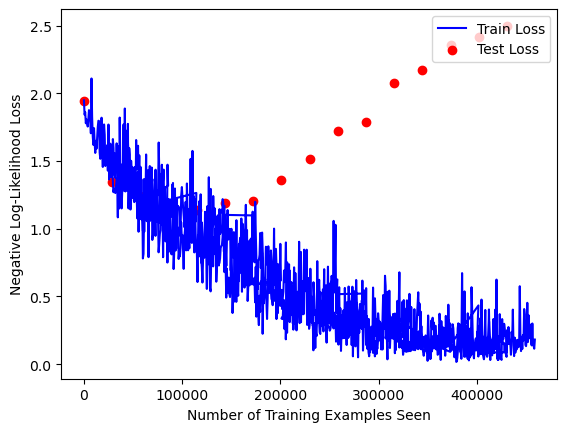

In [17]:
#We plot the Training Curve.
fig = plt.figure()
plt.plot(train_counter, train_losses, color = "blue")
plt.scatter(test_counter, test_losses, color = "red")
plt.legend(["Train Loss", "Test Loss"], loc = "upper right")
plt.xlabel("Number of Training Examples Seen")
plt.ylabel("Negative Log-Likelihood Loss")

* We see that **our Test Losses deviate from the Training Losses significantly!**
* This is not a good result.

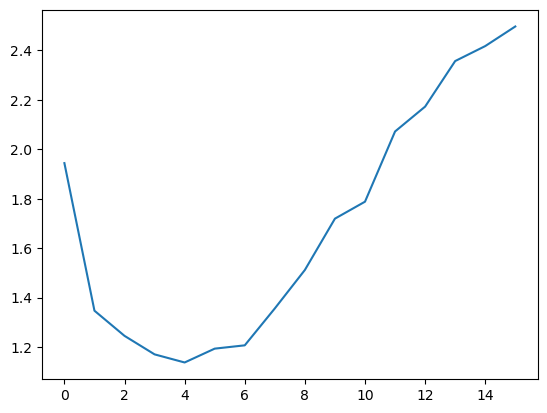

In [18]:
#We plot the Loss History per iteration.
plt.plot(test_losses)
plt.show()

* We see that the Loss from the Test decreases at first but then starts to increase.
* **This is a sign of overfitting!**
* For that reason, we need to **make the data have more variations** and **improve our Convolutional Neural Network.**

### Part 3: Improvements to our Image Preprocessing and Convolutional Neural Network Model <a id = "Part_3"></a>

* **We first transform the input Images a little bit more.**
* **That way, we will avoid the model memorizing the Training Data!**

In [19]:
#New Additions: RandomHorizontalFlip(), RandomRotation(10), RandomCrop(48, padding = 4).
    #RandomHorizontalFlip(): Randomly flips the image Horizontally. (Probability = 0.5)
    #RandomRotation(x): Randomly rotates the image between -x and x degrees.
    #RandomCrop(Y, padding = Z): Randomly crops the image to a size of Y x Y pixels, padding adds Z pixels on
#each side before doing the cropping.
transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1),
                                transforms.Resize((48, 48)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.RandomCrop(48, padding = 4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [20]:
#We get the Images using the transform we have defined.
training_dataset = ImageFolder(root = "train", transform = transform)
test_dataset = ImageFolder(root = "test", transform = transform)

#We print out the datasets.
print("Training Data:", "\n", 90 * "-", "\n", training_dataset)
print(90 * "~")
print("Test Data:", "\n", 90 * "-", "\n", test_dataset)

Training Data: 
 ------------------------------------------------------------------------------------------ 
 Dataset ImageFolder
    Number of datapoints: 28709
    Root location: train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomCrop(size=(48, 48), padding=4)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Data: 
 ------------------------------------------------------------------------------------------ 
 Dataset ImageFolder
    Number of datapoints: 7178
    Root location: test
    StandardTransform
Transform: Compose(
               Grayscale(num_output

In [21]:
#Now we create DataLoader Objects to load the data into the code.
training_loader = DataLoader(training_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [22]:
#We check the Test DataLoader.
test_example = list(test_loader)

#We take an Example Data and Example Target from the list we have defined.
example_data, example_target = test_example[0]

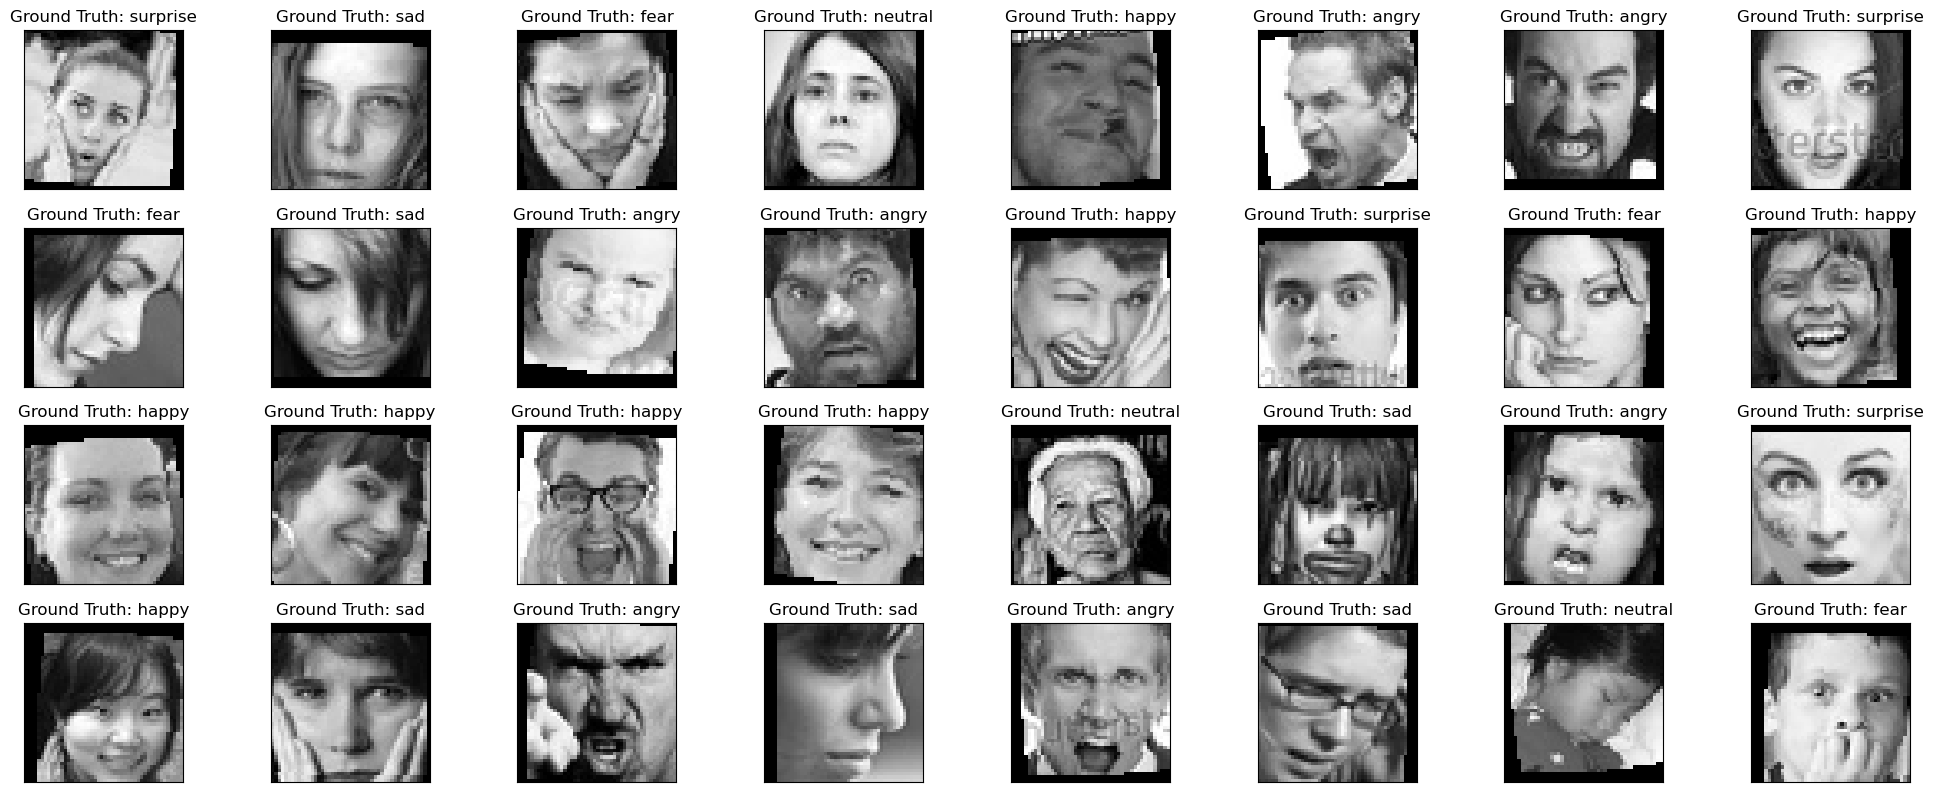

In [23]:
#We will now show some of the Images in our test_dataset batch.
#For this, we get the classes inside the test_dataset batch with .classes.
class_names = test_dataset.classes

#We plot the test_dataset images.
figure = plt.figure(figsize = (20, 10))
for i in range(32):
    plt.subplot(5, 8, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap = "grey", interpolation = "none")
    plt.title(f"Ground Truth: {class_names[example_target[i]]}")
    plt.xticks([])
    plt.yticks([])

* **We see that our Transform is working perfectly fine!**
* There are **randomized horizontal flips, rotations and crops!**

* Now we need to define an **improved Convolutional Neural Network!**
* The **biggest difference is the newly added Batch Normalization `BatchNorm2d()`**.

In [24]:
#New Addition: Convolutional Layers now include more complex structures.
    #self.conv:
        #nn.Conv2d(): Our original Convolutional Layer from previous Model.
        #nn.BatchNorm2d(): Batch Normalization to normalize the input of each mini-batch.
        #nn.ReLU(): ReLU Activation Function with inplace = True which modifies the Input Tensor directly
#without using new memory for output.
        #nn.MaxPool2d(): Max Pooling with stride = 2 meaning that pooling window moves 2 pixels at a time to
#decrease the output size by half!

#Note: Other than the BatchNorm2d the structure is basically the same, except instead of applying ReLU and 
#MaxPooling in "forward(self, x)", we apply it in __init__ with nn.Sequential.

#We define our CNN Class.
class Convolutional_Neural_Network(nn.Module):
    def __init__(self):
        super(Convolutional_Neural_Network, self).__init__()

        #We define our First Convolutional Layer.
        self.conv1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 3, padding = 1),
                                   nn.BatchNorm2d(32),
                                   nn.ReLU(inplace = True),
                                   nn.MaxPool2d(kernel_size = 2, stride = 2))

        #We define our Second Convolutional Layer.
        self.conv2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size = 3, padding = 1),
                                   nn.BatchNorm2d(64),
                                   nn.ReLU(inplace = True),
                                   nn.MaxPool2d(kernel_size = 2, stride = 2))

        #We define our Third Convolutional Layer.
        self.conv3 = nn.Sequential(nn.Conv2d(64, 128, kernel_size = 3, padding = 1),
                                   nn.BatchNorm2d(128),
                                   nn.ReLU(inplace = True),
                                   nn.MaxPool2d(kernel_size = 2, stride = 2))

        #We define the Dropout Layer. (Prevents overfitting!!!)
        self.dropout = nn.Dropout(0.25)

        #We define our First Dense (Fully Connected) Layers.
        self.dense1 = nn.Linear(128 * 6 * 6, 512)

        #We define our Second Dense (Fully Connected) Layers.
        self.dense2 = nn.Linear(512, 7)

    def forward(self, x):
        #We apply the ReLU Activation Function to the First Convolutional Layer. => (F = torch.nn.functional)
        #Then we apply Max Pooling to it using self.pool!
        x = self.conv1(x)

        #We apply ReLU Activation Function to Second Convolutional Layer.
        #Then we apply Max Pooling to it.
        x = self.conv2(x)

        #We apply ReLU Activation Function to Third Convolutional Layer.
        #Then we apply Max Pooling to it.
        x = self.conv3(x)

        #We then Flatten/Reshape the Output.
        x = x.view(-1, 128 * 6 * 6)

        #We apply the First Dense Layer.
        #Then we apply ReLU Activation Function to it for "Non-Linearity"
        x = F.relu(self.dense1(x))

        #We apply the Dropout Layer.
        x = self.dropout(x)

        #Finally, we apply the Second Dense Layer.
        x = self.dense2(x)

        return x

* Now we do our Training and Testing as usual.
* But this time, **we will add a statement where if the Test Loss starts to increase, we will stop the processing/training immediately to avoid overfitting!**

In [25]:
#We first call our new CNN as the new model object.
model = Convolutional_Neural_Network()
print(model)

Convolutional_Neural_Network(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout): Dropout(p=0.25, inplace=False)
  (dense1): Line

In [26]:
#For completion:
#We define our Loss Function as Cross Entropy Loss.
criterion = nn.CrossEntropyLoss()

#We define the Optimizer as "Adam" Optimizer.
#We define the learning rate as lr = 0.001.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [27]:
#Now we will train our new Model.
num_epochs = 70

#We define Lists to keep the Training and Testing Losses and Counters!
train_losses = []
train_counter = []
test_losses = []
test_counter = [i * len(training_loader.dataset) for i in range (num_epochs + 1)]

#We also determine how often the training should log the information about Losses and Counter!
#To avoid too many print statements we do it every 1000 batch indices.
log_interval = 180

#### Note: I train the model for 70 Batches and for that reason it takes a very long time to run (for me it was 2.5 hours), for that reason I saved the 70 Batch Trained Model as a `model.state_dict()` which you can find in the following cells. (I also saved a 30 Batch Trained Model for comparison)

In [28]:
#First we check how well our model predicts the Test Data.
test()


Test Set: Avg. Loss: 1.9529, Accuracy: 119/7178 (2%)



In [29]:
#Now we train our data by looping over the Epochs.
for i, epoch in enumerate(range(1, num_epochs + 1)):
    #We train our Model.
    train(epoch)

    #We check how accurate the Model has become with the Test Data.
    test()

    #We check the test loss, if its increasing, we end the loop.
    if i != 0:
        if test_losses[i+1] - 0.3 > test_losses[i]:
            break

Train Epoch: 1 [0/28709 (0%)]	Loss: 1.950375
Train Epoch: 1 [5760/28709 (20%)]	Loss: 1.858689
Train Epoch: 1 [11520/28709 (40%)]	Loss: 1.631533
Train Epoch: 1 [17280/28709 (60%)]	Loss: 1.500142
Train Epoch: 1 [23040/28709 (80%)]	Loss: 1.550783

Test Set: Avg. Loss: 1.5630, Accuracy: 2916/7178 (41%)

Train Epoch: 2 [0/28709 (0%)]	Loss: 1.551279
Train Epoch: 2 [5760/28709 (20%)]	Loss: 1.818925
Train Epoch: 2 [11520/28709 (40%)]	Loss: 1.668215
Train Epoch: 2 [17280/28709 (60%)]	Loss: 1.418945
Train Epoch: 2 [23040/28709 (80%)]	Loss: 1.514698

Test Set: Avg. Loss: 1.4274, Accuracy: 3232/7178 (45%)

Train Epoch: 3 [0/28709 (0%)]	Loss: 1.474195
Train Epoch: 3 [5760/28709 (20%)]	Loss: 1.361039
Train Epoch: 3 [11520/28709 (40%)]	Loss: 1.387466
Train Epoch: 3 [17280/28709 (60%)]	Loss: 1.414274
Train Epoch: 3 [23040/28709 (80%)]	Loss: 1.365607

Test Set: Avg. Loss: 1.3807, Accuracy: 3324/7178 (46%)

Train Epoch: 4 [0/28709 (0%)]	Loss: 1.229347
Train Epoch: 4 [5760/28709 (20%)]	Loss: 1.528537
Tra

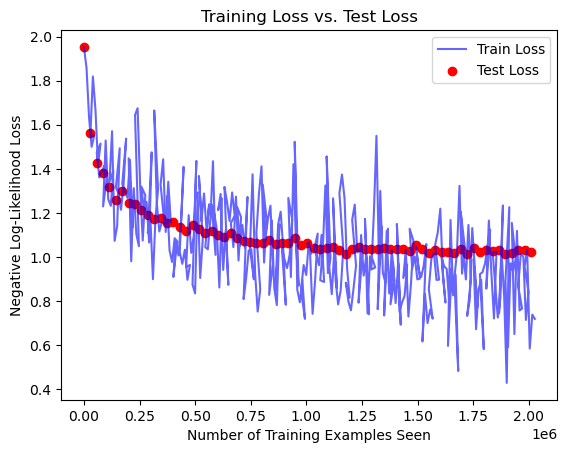

In [31]:
#We plot the Training Curve.
fig = plt.figure()
plt.plot(train_counter, train_losses, color = "blue", alpha = 0.6)
plt.scatter(test_counter, test_losses, color = "red")
plt.legend(["Train Loss", "Test Loss"], loc = "upper right")
plt.title("Training Loss vs. Test Loss")
plt.xlabel("Number of Training Examples Seen")
plt.ylabel("Negative Log-Likelihood Loss")
plt.show()

* **This time our Test Losses and Training Losses are in correlation!**

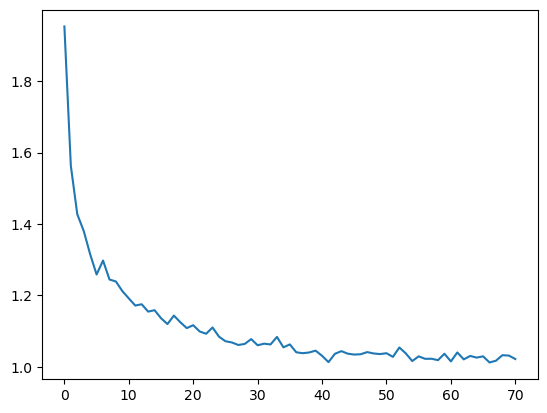

In [32]:
#We plot the Loss History per iteration.
plt.plot(test_losses)
plt.show()

* We can also see that **test loss is decreasing which means that our Model is actually getting trained and getting more accurate when predicting!**
    * **Initial Accuracy before Training:** $2\%$
    * **Final Accuracy after Training:** $62\%$

* Now let's again check our Test Dataset to see how good our guesses are.

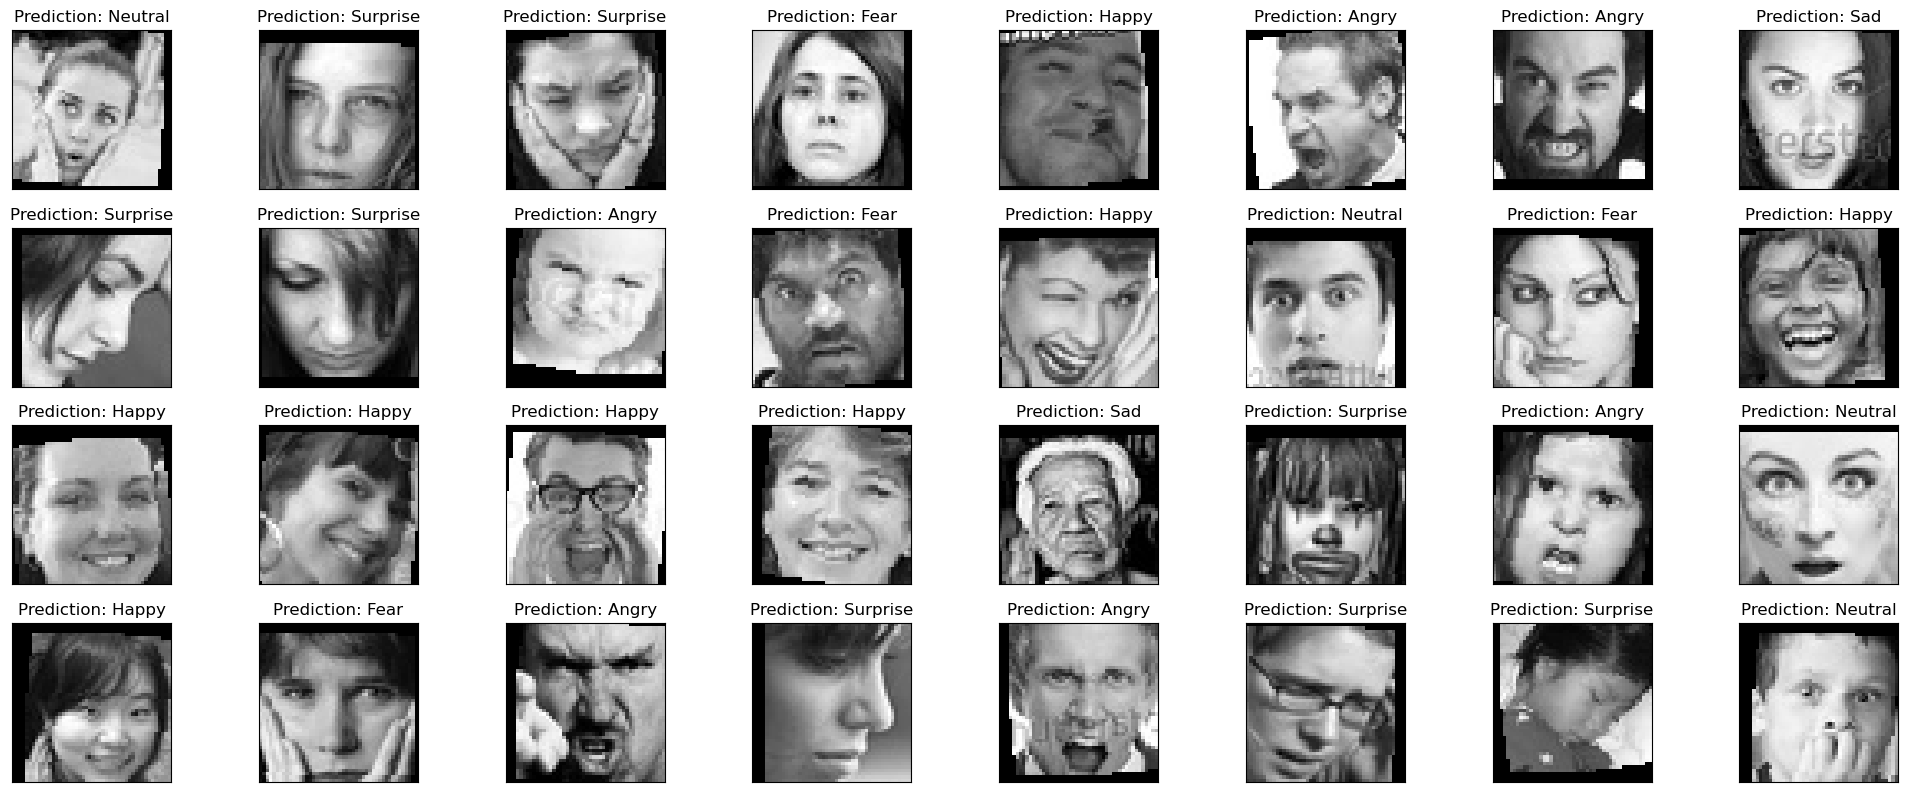

In [187]:
with torch.no_grad():
    output = model(example_data)

#We define a list of the emotions.
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

#We set the model to evaluation mode.
model.eval()

fig = plt.figure(figsize = (20, 10))
for i in range(32):
    plt.subplot(5, 8, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap = "gray", interpolation = "None")

    #We get the Predicted label for the image.
    predicted_label = output.data.max(1, keepdim = True)[1][i].item()

    #We map the Predicted Label to the Corresponding Emotion.
    predicted_emotion = emotions[predicted_label]

    #We print the Prediction for the Image.
    plt.title("Prediction: {}".format(predicted_emotion))
    plt.xticks([])
    plt.yticks([])

* These are not really well made predictions since the accuracy is still relatively low.
* We can also try to guess the emotion for an image we ourselves upload, outside of the dataset.

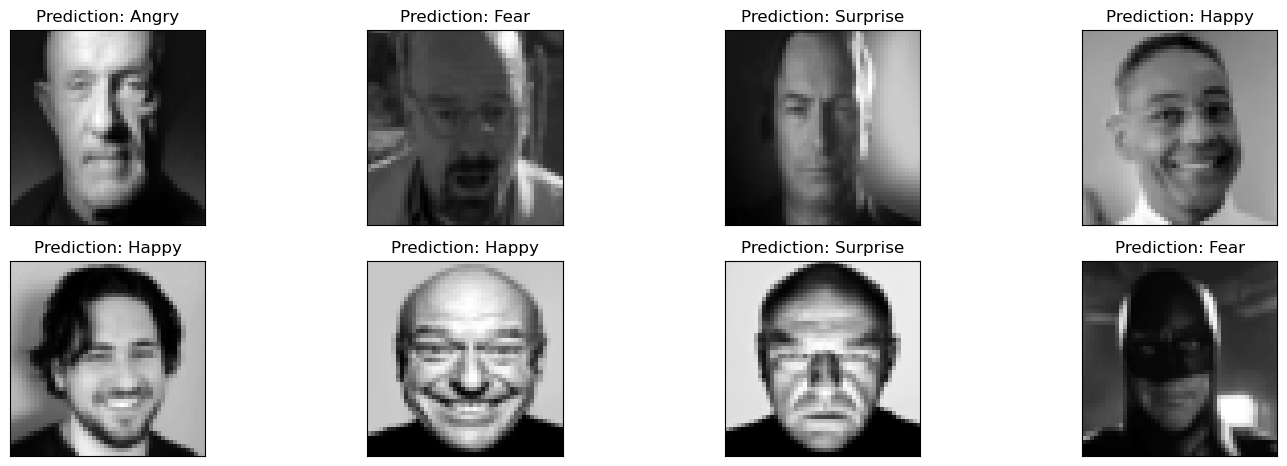

In [237]:
#We import the library we need for this.
from PIL import Image

#We first link our image paths as follows.
image_paths = ["mike.png", "walter.png", "saul.png", "gus.png", "me2.png", "hank1.png", "hank2.png", "man.png"]

#We change the Preprocessing of the Images and revert back to the original Transform.
transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1),
                                transforms.Resize((48, 48)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

#Now we define a list to store the predictions our model makes.
prediction_list = []

#We also set our model to evaluation mode.
model.eval()

#Now our goal is to load each image, preprocess using transform and make predictions.
for image_path in image_paths:
    #We open the Image.
    image = Image.open(image_path)
    
    #Now we transform the image by the transform we have defined previously.
    image = transform(image)

    #We then add a "batch" dimension.
    image = image.unsqueeze(0)

    #We disable the gradient calculation once again.
    with torch.no_grad():
        output = model(image)

    #We then get our predicted label for this image.
    predicted_label = output.data.max(1, keepdim = True)[1].item()

    #We get the predicted emotion using the emotions list.
    predicted_emotion = emotions[predicted_label]

    #We append the predicted emotion to our prediction list.
    prediction_list.append(predicted_emotion)

#We can now show the images and their predicted emotions.
plt.figure(figsize = (15, 5))
for i in range(len(image_paths)):
    plt.subplot(2, int(len(image_paths)/2), i+1)
    plt.tight_layout()
    image = Image.open(image_paths[i])
    image = transform(image)
    plt.imshow(image.squeeze(), cmap = "gray")
    plt.title(f"Prediction: {prediction_list[i]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [238]:
#We can now save our model by using torch.save!
#It saves your model into the dictionary the code is on.
#What it saves: The weights obtained from the training session.

#Commented out to avoid saving the other model as model_improved!
#torch.save(model.state_dict(), "model_improved.pth")

In [239]:
#We can recall and use the model as follows:
model = Convolutional_Neural_Network()
model.load_state_dict(torch.load("model_improved.pth"))

<All keys matched successfully>

* I have **also tried to run the model with 30 Epochs** which ended up with $61\%$ accuracy as well.
* Now let's call that Model.

In [240]:
model = Convolutional_Neural_Network()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

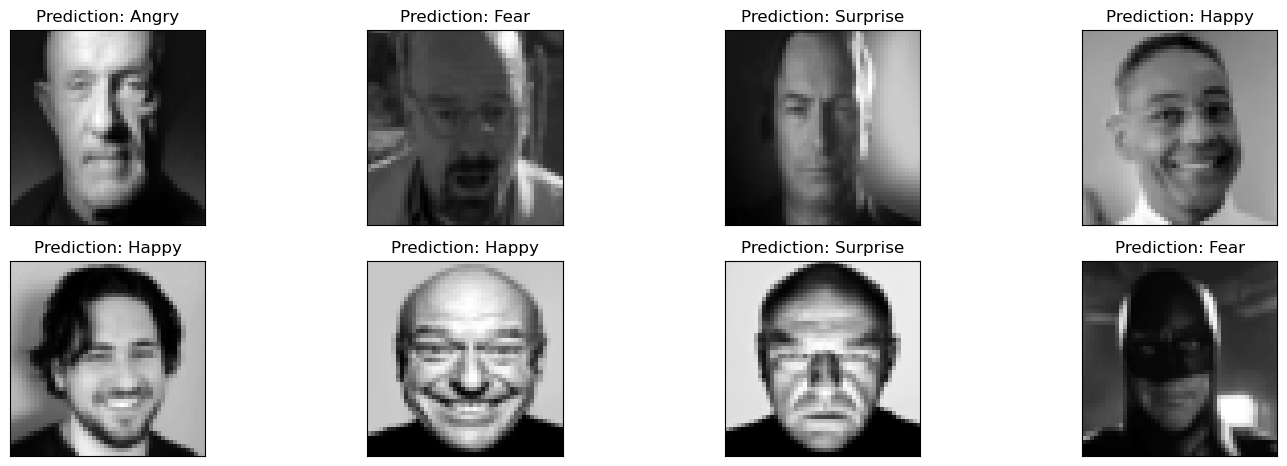

In [241]:
#Now we set our model to evaluation mode and disable the gradient calculation once again.
model.eval()

#Now our goal is to load each image, preprocess using transform and make predictions.
for image_path in image_paths:
    #We open the Image.
    image = Image.open(image_path)
    
    #Now we transform the image by the transform we have defined previously.
    image = transform(image)

    #We then add a "batch" dimension.
    image = image.unsqueeze(0)

    #We disable the gradient calculation once again.
    with torch.no_grad():
        output = model(image)

    #We then get our predicted label for this image.
    predicted_label = output.data.max(1, keepdim = True)[1].item()

    #We get the predicted emotion using the emotions list.
    predicted_emotion = emotions[predicted_label]

    #We append the predicted emotion to our prediction list.
    prediction_list.append(predicted_emotion)

#We can now show the images and their predicted emotions.
plt.figure(figsize = (15, 5))
for i in range(len(image_paths)):
    plt.subplot(2, int(len(image_paths)/2), i+1)
    plt.tight_layout()
    image = Image.open(image_paths[i])
    image = transform(image)
    plt.imshow(image.squeeze(), cmap = "gray")
    plt.title(f"Prediction: {prediction_list[i]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

* **Additionally, we can check something called the Confusion Matrix!**
* **Confusion Matrix:**
    * 1-) **Used to evaluate the Performance of a Classification Model!**
    * 2-) **It is a matrix of $n\times n$ where $n$ is the number of classes!** *(For our case, $n = 7$)*
        * **Rows: Represents the instances in a predicted class!**
        * **Columns: Represents the instances in actual class!**

* **The Confusion Matrix contains the following:**
    * 1-) **True Positive (TP):** *The Number of Correct Predictions that an instance is Positive!* 
    * 2-) **True Negative (TN):** *The Number of Correct Predictions that an instance is Negative!*
    * 3-) **False Positive (FP):** *The Number of Incorrect Predictions that an instance is Positive!*
    * 4-) **False Negative (FN):** *The Number of Incorrect Predictions that an instance is Negative!* 

In [246]:
#For this, we switch back to our 70 Epoch Model.
model.load_state_dict(torch.load("model_improved.pth"))

<All keys matched successfully>

<Figure size 1000x800 with 0 Axes>

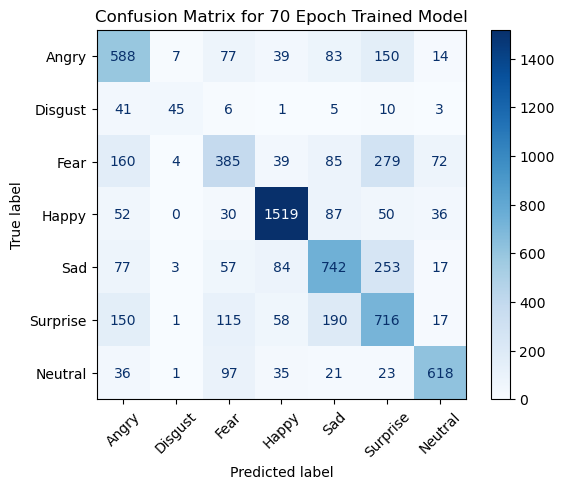

In [247]:
#For the Confusion Matrix we need the following library.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#We change the Preprocessing of the Images and revert back to the original Transform.
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#We load in our Test Dataset.
test_dataset = ImageFolder(root = "test", transform = transform)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

#We again set the model in evaluation mode.
model.eval()

#We define lists to store the True and Predicted Labels.
all_preds = []
all_labels = []

#We get the Images and Emotions from the test Data.
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#We now create the Confusion Matrix.
cm = confusion_matrix(all_labels, all_preds)

#We plot the Confusion Matrix.
plt.figure(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for 70 Epoch Trained Model")
plt.xticks(rotation=45)
plt.show()

In [248]:
#Now we check our 30 Epoch Model.
model = Convolutional_Neural_Network()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

<Figure size 1000x800 with 0 Axes>

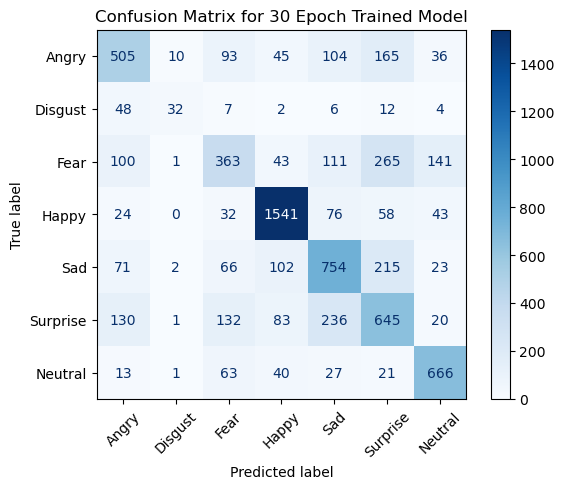

In [249]:
#We load in our Test Dataset.
test_dataset = ImageFolder(root = "test", transform = transform)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

#We again set the model in evaluation mode.
model.eval()

#We define lists to store the True and Predicted Labels.
all_preds = []
all_labels = []

#We get the Images and Emotions from the test Data.
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#We now create the Confusion Matrix.
cm = confusion_matrix(all_labels, all_preds)

#We plot the Confusion Matrix.
plt.figure(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for 30 Epoch Trained Model")
plt.xticks(rotation=45)
plt.show()

* **We can see that our Model is doing a more or less well job predicting the Emotions!**
* **But especially for Disgust, Fear, Sad and Surprise Emotions, there is still need for better accuracy.** *(Also the Angry and Sad emotions too, but the model does well for those emotions compared to others we have listed.)*
* **For Happy, the Model is doing a very good job!**

* To clear up what True Positive, True Negative, False Positive and False Negative means in Confusion Matrices, let's give an example.
* Note that **we are using 30 Epoch Trained Model's Confusion Matrix for this part!**

* **Assume the Class Happy:**
    * 1-) **True Positive (TP):**
        * *The Number of Correct Predictions that an instance is Positive!*
        * **True Positive for Happy:** 1541
        * **True Label:** Happy
        * **Predicted Label:** Happy
    * 2-) **True Negative (TN):**
        * *The Number of Correct Predictions that an instance is Negative!*
        * **Correct Predictions where the expression is not happy!**
        * **So, predicting Angry as Angry, Sad as Sad etc.**
    * 3-) **False Positive (FP):**
        * *The Number of Incorrect Predictions that an instance is Positive!*
        * **False Positive for Happy:** 45 + 2 + 43 + 102 + 83 + 40 = 315
        * **True Label:** Other than Happy
        * **Predicted Label:** Happy
    * 4-) **False Negative (FN):**
        * *The Number of Incorrect Predictions that an instance is Negative!*
        * **False Negative for Happy:** 24 + 32 + 0 + 76 + 58 + 43 = 233
        * **True Label:** Happy
        * **Predicted Label:** Other than Happy

### Discussion

#### Discussion Part 1: Introduction of the Dataset & Preprocessing

* We have plotted the distribution of emotions in our Training and Test Dataset as follows.

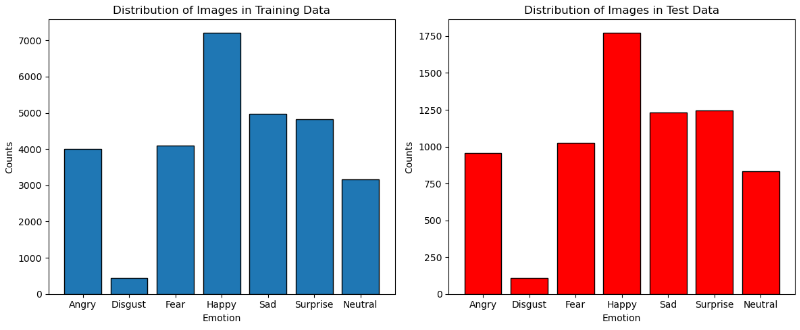

* From here we can see that the **Happy images have by far the largest amount** compared to the other Emotions.
* **That's why the Model is best at detecting the Happy Emotion on the Images!**
    * **Also due to the fact that Happy expressions have distinctive featres compared to other emotions!**

* As for **Disgust, it has the lowest amount** and for that reason the **model usually struggles to predict that emotion from the images.**
* **Smaller Number of Training Examples means that the Model is not trained well enough to detect features of Disgust Emotion.**
* Note that compared to Happy Emotion, Disgust Emotion has **far more less distinctive features!**

* To see the proof of what we have discussed, refer to the **Confusion Matrices** on **[Discussion Part 3](#Discussion_Part_3)**.

#### Discussion Part 2: Defining the Model & Training the Model

* We first created a Convolutional Neural Network (CNN) without the Batch Normalization Layers. (More information about how the CNN looks like can be found on **[Part 2](#Part_2)**)
* We trained the model for 15 Batches which resulted in the following Train and Test Losses.

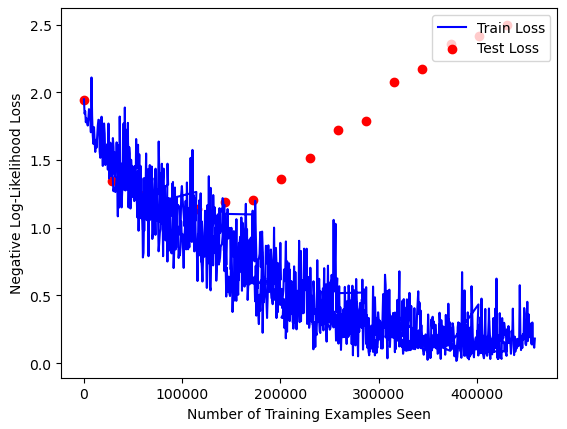|
-

* **From here we can see that the Test Loss diverges from the Train Loss.**
* This is a **sign of the Model overfitting i.e. Model does well on Training Data but fails to generalize the Test Data!**
* To avoid this happening, we could check the Test Losses and stop the Training when the Test Losses start to increase.
* **Or, we could update our CNN and also change the Image Transforms a little bit to add more variation!**

#### Discussion Part 3: Improvements to our Image Preprocessing and Convolutional Neural Network Model <a id = "Discussion_Part_3"></a>

* On this part, we improved our CNN by adding Batch Normalization!
* We also created a transform so that the images randomly flip, rotate or get cropped for more variety.
* **We trained our new CNN for 70 batches!**
* **I also had trained the same CNN for 30 batches, which I've called in as well for comparison.**

* For **Improved CNN with 70 Batches** we got the following Training Curve.

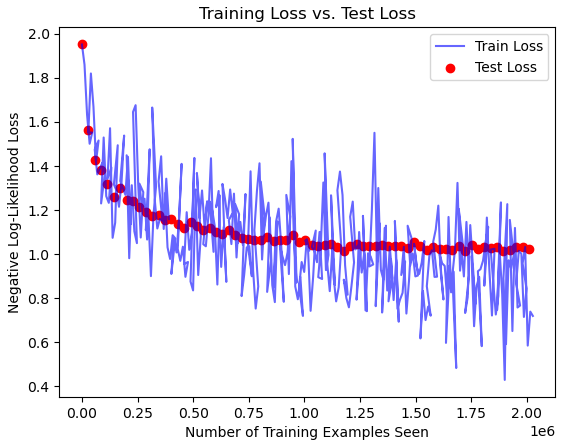|
-

* **In here we can see that our Training Loss and Test Loss are completely in order.**
* **This means that there is no Overfitting, which means that the Model is Trained well for Test Data predictions.**

* For both 30 Batch and 70 Batch training run for our Model, we got the same accuracy of $62\%$!
* For that reason, we could train the model for less Batches and still get a fair result.
* This will be discussed further soon.

* After this, we used images outside of our dataset and made predictions with our model.

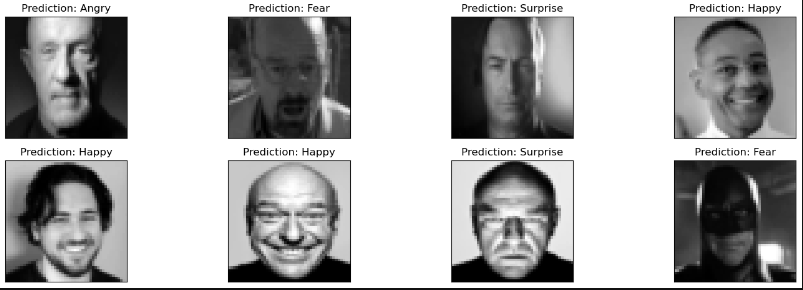|
-

* We can see that the Model did a great job on detecting **Happy Emotions.**
* But when it comes to **Neutral, Surprised and Anger Emotions** model does have a problem with its predictions.
* This can also be seen on the Confusion Matrices of our 30 Batch and 70 Batch Models.

| 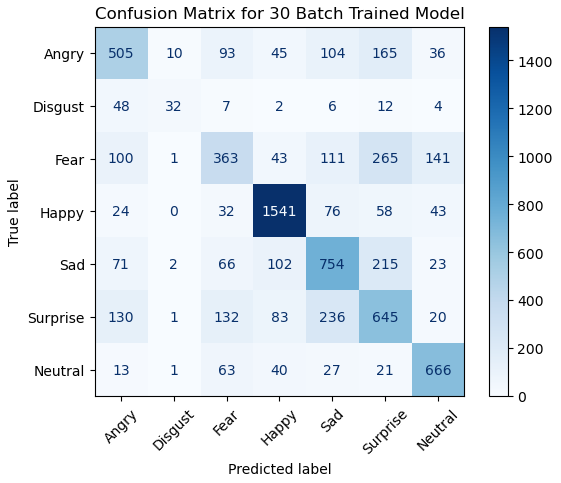 | 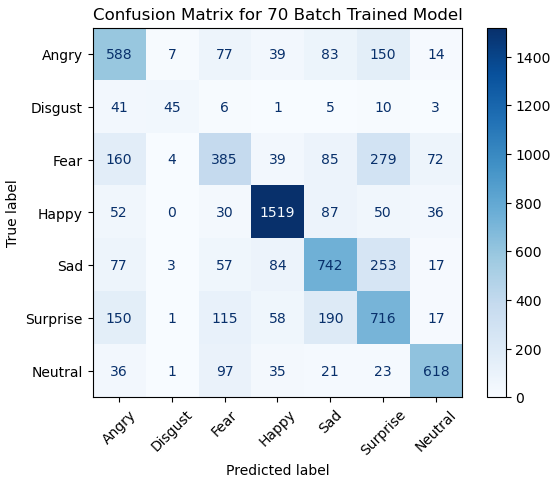 |
| - | - |

* Note that there isn't a huge difference between the two models, but there are slight improvements and deteriorations on some of the emotion predictions.

* **We are now looking at the Confusion Matrix for 30 Batch Trained Model!**

* **For Happy Emotion there are High True Positives which means the Model is really good at predicting Happy Emotions by Facial Recognition!**
    * *Easier to recognize and learn the features!*
    * *Large number of Images!*

* **For Angry and Fear Emotions we see that they get confused a lot.**
    * True Label Angry - Predicted Label Fear: **93**
    * True Label Fear - Predicted Label Angry: **100**
    * **This is due to the model not being able to differentiate between the two emotions, probably due to the Facial Feature Similarities.**

* **For Surprise and Other Emotions:**
    * True Label Surprise - Predicted Label Angry: **130**
    * True Label Surprise - Predicted Label Fear: **132**
    * True Label Surprise - Predicted Label Sad: **236**
    * **There is a very large confusion with Fear, Angry and Sad Emotions!**
    * **This could be expected since Surpise has some similar facial expressions with Fear (open mouth when scared), Angry (open mouth when screaming) and Sad Emotions.**

* **For Sad and Other Emotions:**
    * True Label Sad - Predicted Label Happy: **102**
    * True Label Sad - Predicted Label Surprise: **215**
    * True Label Sad - Predicted Label Angry: **71**
    * **This could be expected since Sadness also has some similar facial expressions with Happy (the expressions can sometimes be similar), Angry (mental breakdown expressions could be similar to anger expressions) and Surprise Emotions.**

* **For Disgust Emotion:**
    * **There aren't much Images to start with.**
    * **For that reason the Model is not trained enough to learn about the facial features of Disgust Emotion.**
    * **It could also be due to the fact that Disgust has less distinctive features.**

* ***All of these results make sense considering that our Accuracy is $62\%$!***

### Conclusion

* **In summary:**
    * 1-) We used a Dataset of images that contained 7 Different Emotions (Angry, Disgust, Fear, Happy, Sad, Surprise and Neutral) and transformed them into appropriate images for training.
    * 2-) We defined a Convolutional Neural Network Model to predict 7 different Emotions from Facial Recognition.
    * 3-) We trained the Model for 70 Epochs with Mini Batch sizes of 32 Images.
    * 4-) We obtained a Model with $62\%$ Accuracy for Predictions.
    * 5-) We used the Test Data and additionally used images outside of our Dataset to check how accurate the model predictions are.
    * 6-) We checked the Confusion Matrix to see how well our Model does.

* **What could be improved?**
    * 1-) **We could increase the number of images in our dataset, especially for Emotions that have less images (such as Disgust), in order to get a better prediction model.**
    * 2-) **We could improve our Convolutional Neural Network further, add additional Convolutional Layers in order to get better results. (Or use Pretrained Advanced Models)**
        * A few of the CNN Examples can be found on codes in **[Kaggle](https://www.kaggle.com/datasets/msambare/fer2013/code?datasetId=786787&sortBy=voteCount)**!
        * In one of the codes in the **Kaggle** website, someone has reached $80\%$ accuracy with their CNN Model!
    * 3-) **We could run more batches in order to train the model better.**
        * *We need to check if the Test Loss i.e. the **Validation Loss** increases or decreases after each batch we analyze!*
    * 4-) **We could use better Data Augmentation Techniques i.e. Image Transforms to better capture the variations in facial expressions!**

Usage of AI: *Used on defining the CNN model and the logic behind it, also used on improving the CNN in Part 2. Used for image transforming ideas to make the images more variable such as Random Horizontal Flip. Most of the Machine Learning code used on this assignment comes from the Homework Assignments.*